In [10]:
import pandas as pd


data = pd.read_csv('SaaS-Sales.csv')


print(data.head())


   Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         

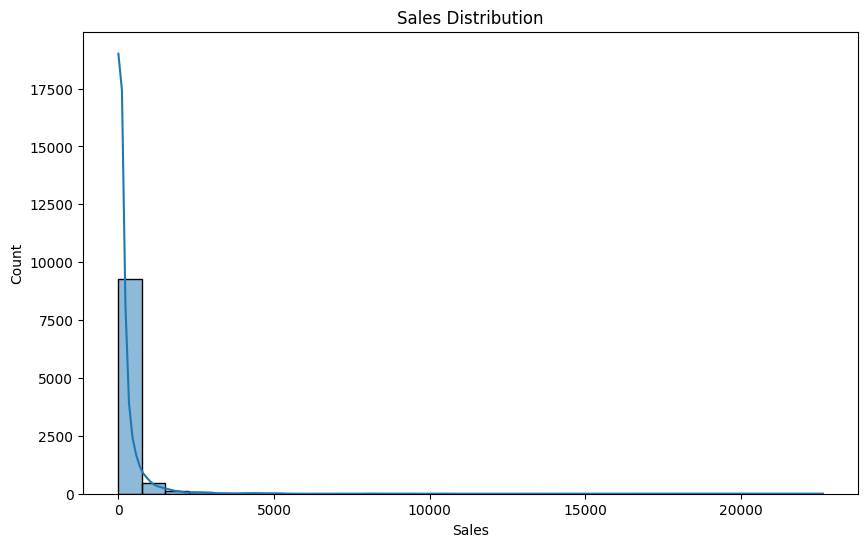

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()


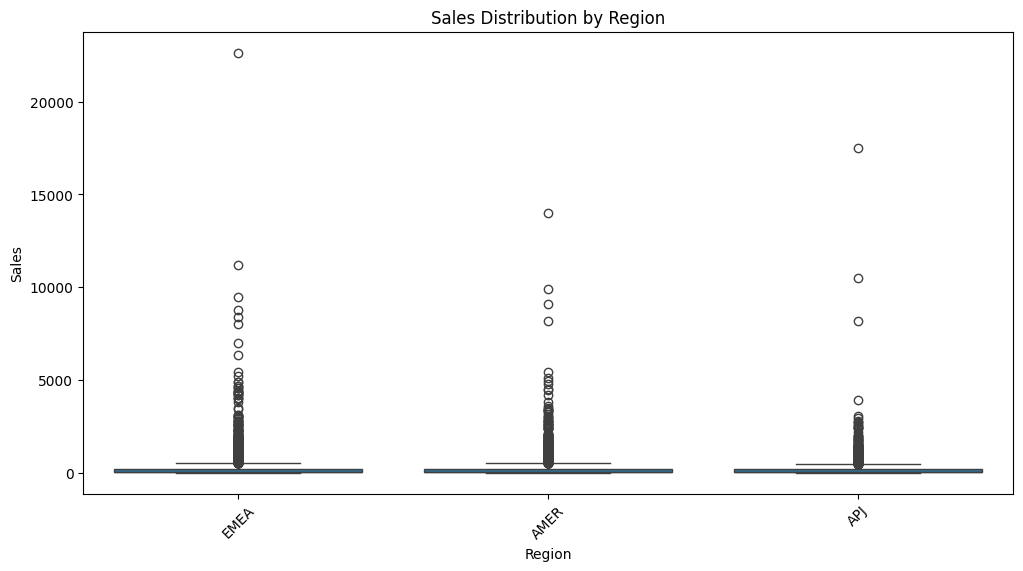

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=data)
plt.title('Sales Distribution by Region')
plt.xticks(rotation=45)
plt.show()



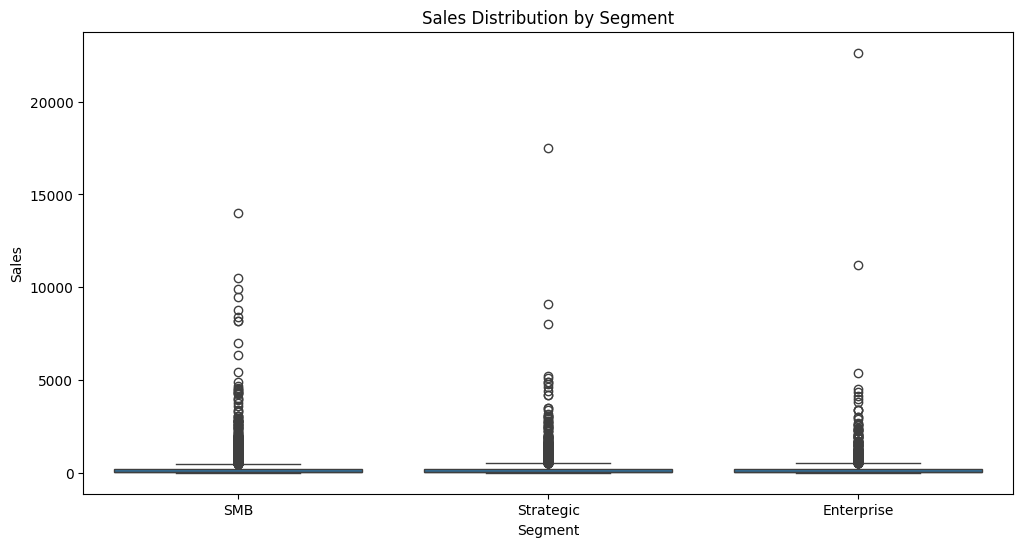

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Sales', data=data)
plt.title('Sales Distribution by Segment')
plt.show()


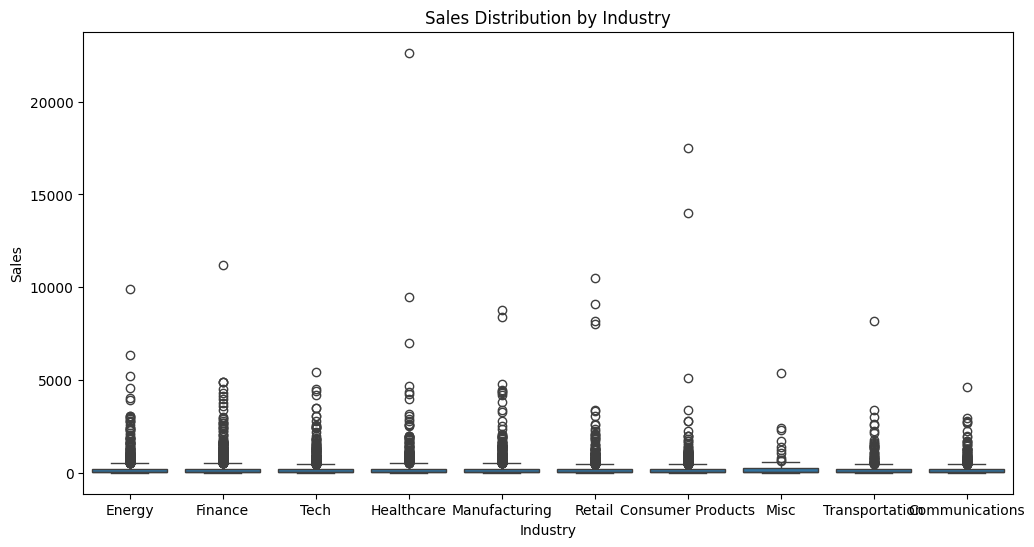

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Sales', data=data)
plt.title('Sales Distribution by Industry')
plt.show()


In [19]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure the training and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Check if the encoding worked
print(X_train_encoded.head())


      Date Key  Quantity  Discount   Profit  Country_Argentina  \
4100  20230620         1       0.8  -5.2072              False   
2586  20230701         7       0.0  67.1139              False   
9194  20201130         7       0.2   3.5994              False   
2002  20231226         3       0.0   9.5940              False   
7225  20220715         4       0.0  10.1640              False   

      Country_Australia  Country_Austria  Country_Belgium  Country_Brazil  \
4100              False            False            False           False   
2586              False            False            False           False   
9194              False            False            False           False   
2002              False            False            False           False   
7225              False            False            False           False   

      Country_Canada  ...  Customer_Tyson Foods  \
4100           False  ...                 False   
2586           False  ...             

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)


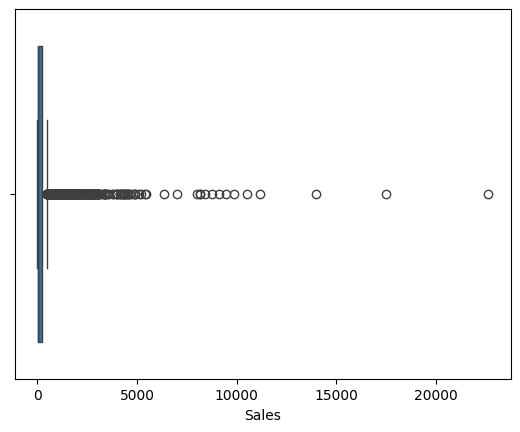

In [25]:
# Check for outliers
sns.boxplot(x=df["Sales"])
plt.show()

# Remove outliers using IQR method
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Sales"] >= Q1 - 1.5 * IQR) & (df["Sales"] <= Q3 + 1.5 * IQR)]
